#**Aprendizaje Automático** - 2023
# Clase 9: Redes neuronales

*Trabajaron en esta notebook: Sofia Del Pozo, Diego Onna, Gaston Bujia*



## Contenidos

* Perceptrón Simple
* Clasificación datos provenientes de la tabla de AND
* Clasificación datos provenientes de la tabla de  XOR

Basado en:
https://flipdazed.github.io/blog/python%20tutorial/introduction-to-neural-networks-in-python-using-XOR

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

***
# Perceptrón


El perceptrón simple es un tipo básico de neurona artificial utilizado en redes neuronales artificiales. Fue desarrollado por Frank Rosenblatt en 1958 y se utiliza como una unidad básica de procesamiento en las redes neuronales.

El perceptrón simple toma una o más entradas, aplica pesos a cada entrada y produce una salida. Estos pesos se utilizan para determinar la importancia relativa de cada entrada en el cálculo de la salida. También tiene un umbral, que se utiliza para determinar si el perceptrón se activa (produce una salida) o no.

El proceso de entrenamiento del perceptrón simple implica ajustar los pesos y el umbral para que la neurona produzca la salida deseada para un conjunto de entradas dados.


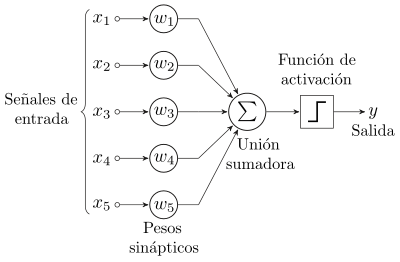

Vamos a empezar ajustar las tablas de la verdad del OR y XOR para obtener clasificadores que puedan emular esas operaciones lógicas. Recordamos las tablas de verdad de estas fórmulas lógicas

Tabla de verdad AND

| A   | B   | A AND B |
| --- | --- | ------ |
| 0   | 0   | 0      |
| 0   | 1   | 0      |
| 1   | 0   | 0      |
| 1   | 1   | 1      |

Tabla de verdad OR

| A   | B   | A OR B |
| --- | --- | ------ |
| 0   | 0   | 0      |
| 0   | 1   | 1      |
| 1   | 0   | 1      |
| 1   | 1   | 1      |

Tabla de verdad XOR

| A   | B   | A XOR B |
| --- | --- | ------- |
| 0   | 0   | 0       |
| 0   | 1   | 1       |
| 1   | 0   | 1       |
| 1   | 1   | 0       |

Estas tablas las podemos representar en un plano de la siguiente manera:

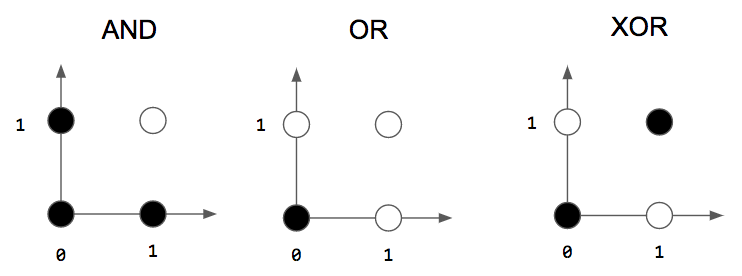

 A simple vista podemos notar que en el caso de OR alcanza con definir un plano para hacer la clasificación. Mientras que en el caso de XOR se necesitan dos planos y esto tendrá un fuerte efecto en el modelado de los datos.


**IMPORTANTE** Para la notebook esta, no nos interesa la generalización del modelo ya que solo queremos estudiar la capacidad del perceptrón para poder separar las clases de interés, en este caso la clase *False* de la clase *True*. Por este motivo verán que no definimos conjunto de entrenamiento, test, etc.

## El problema del OR

Vamos a reprepresentar el OR y armar un clasificador binario que pueda separar entre los casos.

In [3]:
# Creemos la funcion or y los datos necesarios
def func_or(x1, x2):
    return bool(x1) or bool(x2)

inputs = [[0,0],[0,1],[1,0],[1,1]]

x = np.array(inputs)
y = np.array([func_or(*x) for x in inputs])

data = pd.DataFrame(x, columns=['x1', 'x2'])
data['or'] = y
data

,x1,x2,or
0,0,0,False
1,0,1,True
2,1,0,True
3,1,1,True


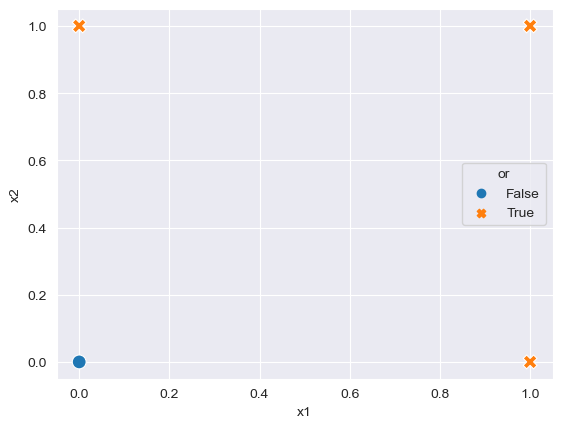

In [4]:
sns.scatterplot(data=data, x='x1', y='x2', style='or', hue='or', s=100)
plt.show()

Planteamos un perceptrón único que tiene una función sigmoide como función de activación sigmoidea. Este planteo que haremos no es el clásico del *Perceptrón* planteado por Rosenblatt, sino que lo entrenaremos usando el [método del descenso del gradiente](https://es.wikipedia.org/wiki/Descenso_del_gradiente) y que en vez de utilizar una función escalón clasíca usaremos como función de activación a la función sigmoidea.

In [30]:
# Seteamos una semilla
np.random.seed(42)

def func_or(x1, x2):
    return bool(x1) or bool(x2)

# Función de activación
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Función de error a optimizar
def error(target, prediction):
    return .5 * (target - prediction)**2

# Entrada (combinaciones posibles de la tabla de verdad)
inputs = [[0,0],[0,1],[1,0],[1,1]]

x = np.array(inputs)
y = np.array([func_or(*x) for x in inputs], dtype=int)

# Hiperparámetros de entrenamiento
alpha = .05
epochs = 100
n_neurons_input, n_neurons_output = 2, 1

# Inicializamos los pesos aleatorios de la red (depende de la semilla)
w_output = np.random.random(size=(n_neurons_input, n_neurons_output))
b_output = np.random.random(size=(1, n_neurons_output))

# Ciclo de entrenamiento
errors = []
params = []
for i in range(epochs):
    # Propagación forward
    y_output = sigmoid(np.dot(x, w_output) + b_output)

    # Calcula el error medio en esta epoch
    e = error(y, y_output).mean()

    # Para cda elemento en el training set
    for index in range(4):
      update = alpha * (y[index] - y_output[index])
      w_output[0] += update * x[index][0]
      w_output[1] += update * x[index][1] 
      b_output += update

    # Guardo los resultados
    errors.append(e)
    params.append(np.concatenate((w_output.ravel(), b_output.ravel())))

Procedemos a graficar la frontera de decisión del perceptrón que acabos de entrenar:

In [31]:
def plot_decision(ax, w = w_output, b = b_output):
    x0_1, x0_2 = 0, 1
    x1_1 = (-float(w[0]) * x0_1 - float(b)) / float(w[1])
    x1_2 = (-float(w[0]) * x0_2 - float(b)) / float(w[1])
    ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")


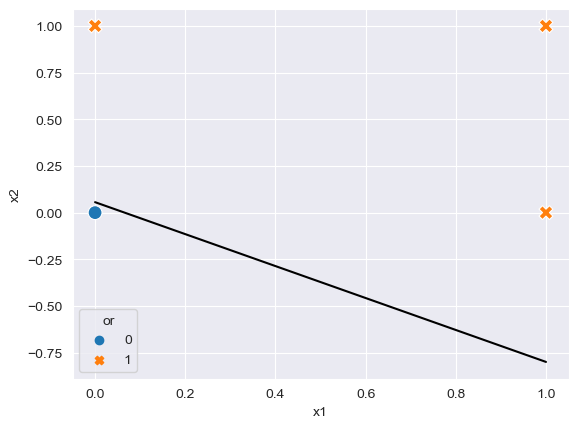

In [32]:
data = pd.DataFrame(x, columns=['x1', 'x2'])
data['or'] = y
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.scatterplot(data=data, x='x1', y='x2', style='or', hue='or', s=100)
plot_decision(ax)
plt.show()

Podemos ver una representación 3D del problema y como el perceptrón generar una frontera de decisión para poder hacer la clasificación binaria.

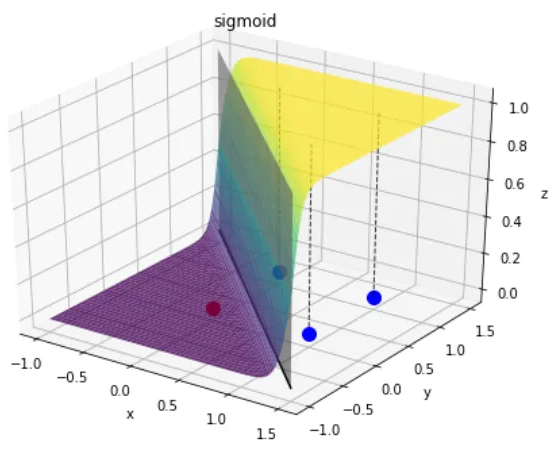

## El problema del XOR

Ahora veamos el problema del XOR en este caso no es posible hacer una separación basada en una única recta. Por lo que es necesario agregar capas ocultas para poder modelar nuestros datos.


In [33]:
def func_xor(x1, x2):
    return bool(x1) != bool(x2)

inputs = [[0,0],[0,1],[1,0],[1,1]]

x = np.array(inputs)
y = np.array([func_xor(*x) for x in inputs])

data = pd.DataFrame(x, columns=['x1', 'x2'])
data['xor'] = y
data

,x1,x2,xor
0,0,0,False
1,0,1,True
2,1,0,True
3,1,1,False


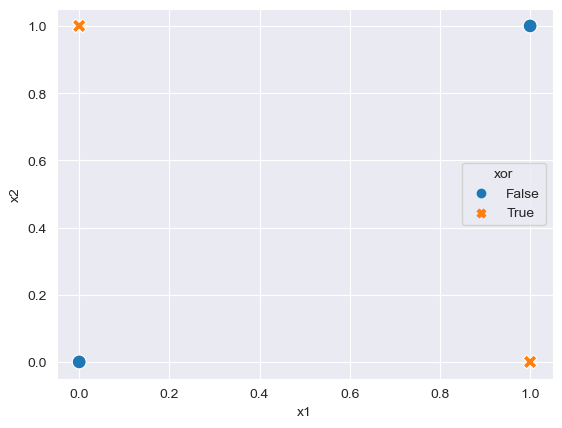

In [34]:
sns.scatterplot(data=data, x='x1', y='x2', style='xor', hue='xor', s=100)
plt.show()

¿Es posible separar este espacio en con un solo perceptrón? NO! Es una caso que no es linealmente separable. 

Para poder solucionar esto, tenemos que complejizar un poco el perceptrón simple y necesitaremos agregar *capas ocultas*: Perceptrón multicapa. Nuevamente nuestra red tendrá dos entradas, pero plantemos dos perceptrones ocultos y uno de salida. Tambien utilizamos la función sigmoide como función de activación escalón.

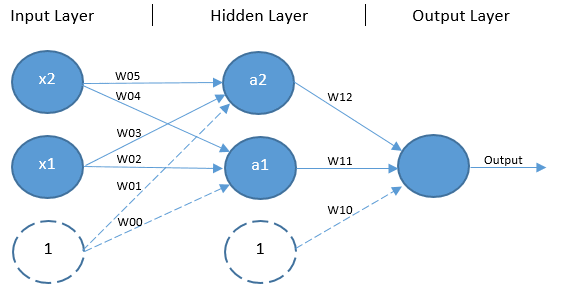



Como dijimos que ibamos a usar el método de descenso del gradiente, por lo cuál necesitamos calcular las derivadas del modelo y del error en función de los parámetros. Vamos a programar todo eso:

In [52]:
np.random.seed(42)

def xor(x1, x2):
    return bool(x1) != bool(x2)

def sigmoid_derivative(sigmoid_result):
    return sigmoid_result * (1 - sigmoid_result)

def error_derivative(target, prediction):
    return - target + prediction

inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]

x = np.array(inputs)
y = np.array([[xor(*i)] for i in inputs], dtype=int)

alpha = 0.02
n_neurons_input, n_neurons_hidden, n_neurons_output = 2, 2, 1

w_hidden = np.random.random(size=(n_neurons_input, n_neurons_hidden))
b_hidden = np.random.random(size=(1, n_neurons_hidden))

w_output = np.random.random(size=(n_neurons_hidden, n_neurons_output))
b_output = np.random.random(size=(1, n_neurons_output))

errors = []
params = []
grads = []

e=1 # para inicializar la variable en un valor mayor al mínimo error. para el while
while e > 1e-4:
    # forward prop
    y_hidden = sigmoid(np.dot(x, w_hidden) + b_hidden)
    y_output = sigmoid(np.dot(y_hidden, w_output) + b_output)

    # calculo el error medio en cada epoch
    e = error(y, y_output).mean()
    # if :
    #     break
    #
    # back prop
    grad_output = error_derivative(y, y_output) * sigmoid_derivative(y_output)
    grad_hidden = grad_output.dot(w_output.T) * sigmoid_derivative(y_hidden)

    # actualización de los parametros
    w_output -= alpha * y_hidden.T.dot(grad_output)
    w_hidden -= alpha * x.T.dot(grad_hidden)

    b_output -= alpha * np.sum(grad_output)
    b_hidden -= alpha * np.sum(grad_hidden)

    # guardo los valores parciales
    errors.append(e)
    grads.append(np.concatenate((grad_output.ravel(), grad_hidden.ravel())))
    params.append(np.concatenate((w_output.ravel(), b_output.ravel(),
                                  w_hidden.ravel(), b_hidden.ravel())))

print("fin")

fin


Grafiquemos el error, el valor de los gradientes para ver su comportamiento y el valor absoluto de los parámetros.

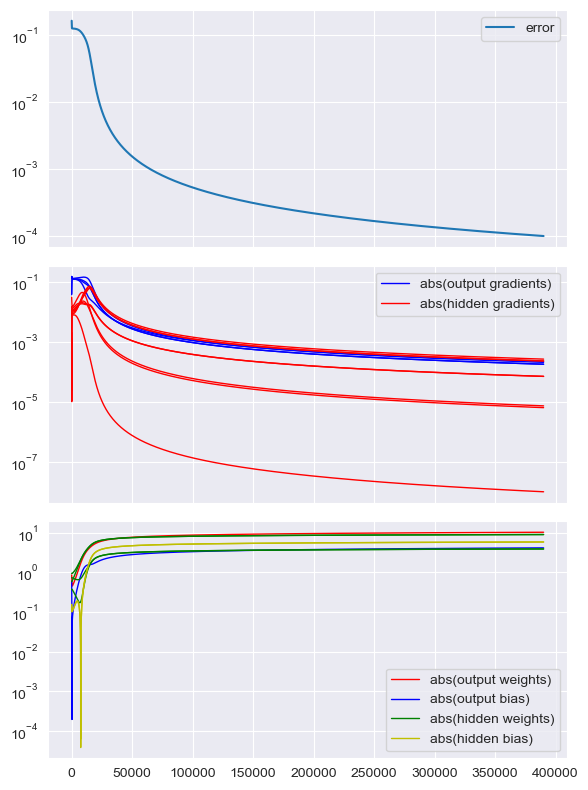

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

fig, axes = plt.subplots(3, 1, figsize=(6, 8), sharex=True) 

pd.DataFrame(errors, columns=['error']).plot(ax=axes[0], logy=True)
df_grads = pd.DataFrame(grads)
df_params = pd.DataFrame(params)

for i in range(4):
    axes[1].plot(df_grads.iloc[:, i].abs(), c='b', label='abs(output gradients)' if i==1 else '__nolabel', lw=1)
for i in range(4, 12):
    axes[1].plot(df_grads.iloc[:, i].abs(), c='r', label='abs(hidden gradients)' if i==4 else '__nolabel', lw=1)

for i in range(1, 2):
    axes[2].plot(df_params.iloc[:, i].abs(), c='r', label='abs(output weights)' if i==1 else '__nolabel', lw=1)

axes[2].plot(df_params.iloc[:, 2].abs(), c='b', label='abs(output bias)', lw=1)

for i in range(3, 7):
    axes[2].plot(df_params.iloc[:, i].abs(), c='g', label='abs(hidden weights)' if i==3 else '__nolabel', lw=1)

for i in range(7, 9):
    axes[2].plot(df_params.iloc[:, i].abs(), c='y', label='abs(hidden bias)' if i==7 else '__nolabel', lw=1)

axes[1].legend()
axes[1].set_yscale('log')

axes[2].legend()
axes[2].set_yscale('log')

fig.tight_layout()


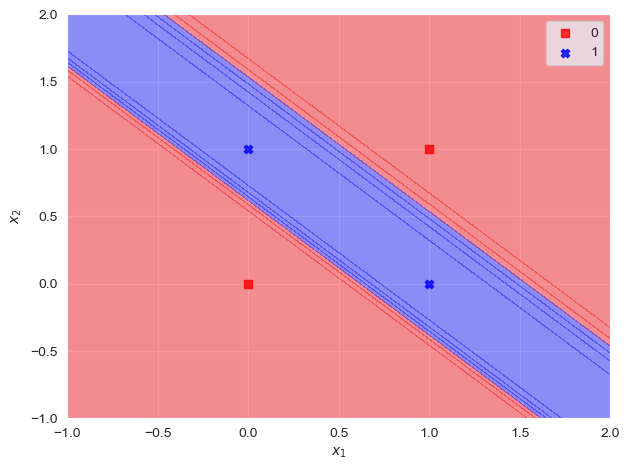

In [44]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

resolution = 100

def predict(x):
    y_hidden = sigmoid(np.dot(x, w_hidden) + b_hidden)
    return sigmoid(np.dot(y_hidden, w_output) + b_output)

markers = ('s', 'X')
colors = ('red', 'blue')

x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, resolution),
                       np.linspace(x2_min, x2_max, resolution))

z = predict(np.array([xx1.ravel(), xx2.ravel()]).T)
z = z.reshape(xx1.shape[0], xx1.shape[1])  # Cambiar la forma de z a (xx1.shape[0], xx1.shape[1])

fig, ax = plt.subplots()
ax.contourf(xx1, xx2, z, alpha=0.4, cmap=ListedColormap(colors))
ax.set_xlim(xx1.min(), xx1.max())
ax.set_ylim(xx2.min(), xx2.max())

for idx, cl in enumerate(np.unique(y)):
    ax.scatter(x=x[(y == cl).ravel(), 0],
               y=x[(y == cl).ravel(), 1],
               alpha=0.8, c=colors[idx],
               marker=markers[idx], label=cl)
ax.legend()
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
fig.tight_layout()


Al representar en 3D queda evidenciada la necesidad de utilizar una arquitectura más compleja para poder generar la función que produzca la clasificación binaria.

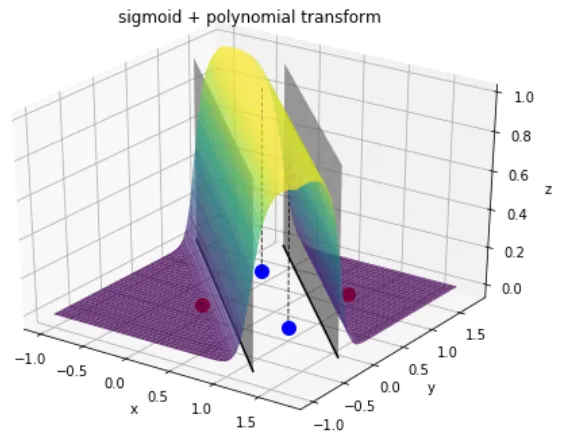